In [11]:
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot

In [12]:
def function(x, y):
    f = 100.0 * (y - x * x) * (y - x * x) + (1.0 - x) * (1.0 - x)
    return f

In [13]:
def gradient(x, y):
    grad = np.zeros((2))
    grad[0] = -400.0 * x * (y - x * x) - 2.0 * (1.0 - x)
    grad[1] = 200.0 * (y - x * x)
    return grad

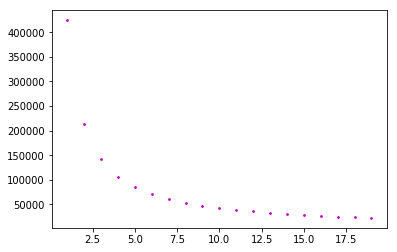

In [14]:
#1 способ
X = []
Y = []
for t in range(19, 0, -1):
    x = 0
    y = 3
    numb = 0
    while(np.linalg.norm(gradient(x, y)) > 0.00000001):
        grad = gradient(x, y)
        x = x - (t * grad[0] / 10000.0)
        y = y -  (t * grad[1] / 10000.0)
        numb += 1
    X.append(t)
    Y.append(numb)
plot = plt.pyplot.scatter(X, Y, s = 3, c = 'm')
plt.pyplot.show()

In [15]:
#t_opt из графика берем равное 19

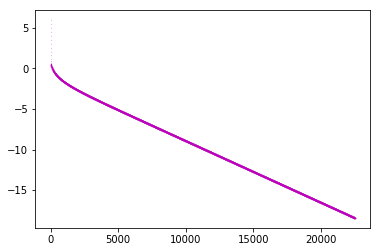

Число итераций: 
22513
Норма невязки: 
9.995760711986306e-09
Норма ошибки: 
2.5029400473995886e-08
Решение: 
(0.9999999888244034, 0.9999999776040868)


In [16]:
X_1 = []
Y_1 = []
t_opt = 19
x = 0
y = 3
numb = 0
while(np.linalg.norm(gradient(x, y)) > 0.00000001):
    grad = gradient(x, y)
    x = x - (t_opt * grad[0] / 10000.0)
    y = y -  (t_opt * grad[1] / 10000.0)
    X_1.append(numb)
    Y_1.append(math.log(np.linalg.norm(gradient(x, y))))
    numb += 1
plot = plt.pyplot.scatter(X_1, Y_1, s = 0.01, c = 'm')
plt.pyplot.show()
print("Число итераций: ")
print(numb)
print("Норма невязки: ")
print(np.linalg.norm(gradient(x, y)))
print("Норма ошибки: ")
error = [x - 1, y - 1]
print(np.linalg.norm(error)) 
print("Решение: ")
print(x, y)

In [17]:
def find_t_for_quickest_discent(x, y):
    a = 0.00000001
    b = 1.0
    grad = gradient(x, y)
    while(b - a > 0.00000001):
        t_1 = b - (b - a) / 1.6180339887
        t_2 = a + (b - a) / 1.6180339887
        if(function(x - t_1 * grad[0], y - t_1 * grad[1]) >= function(x - t_2 * grad[0], y - t_2 * grad[1])):
            a = t_1
        else:
            b = t_2
    return float((b + a) / 2)

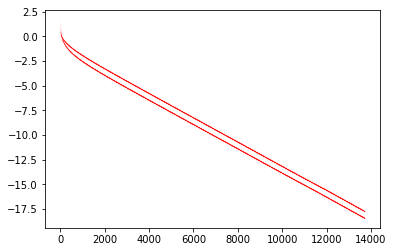

Число итераций: 
13708
Норма невязки: 
9.998091243884923e-09
Норма ошибки: 
2.240108961939946e-08
Решение: 
(0.9999999900019293, 0.9999999799538682)


In [18]:
#2 способ
X_2 = []
Y_2 = []
x = 0
y = 3
numb = 0
while(np.linalg.norm(gradient(x, y)) > 0.00000001):
    grad = gradient(x, y)
    t = find_t_for_quickest_discent(x, y)
    x = x - t * grad[0]
    y = y -  t * grad[1]
    X_2.append(numb)
    Y_2.append(math.log(np.linalg.norm(gradient(x, y))))
    numb += 1
plot = plt.pyplot.scatter(X_2, Y_2, s = 0.001, c = 'r')
plt.pyplot.show()
print("Число итераций: ")
print(numb)
print("Норма невязки: ")
print(np.linalg.norm(gradient(x, y)))
print("Норма ошибки: ")
error = [x - 1, y - 1]
print(np.linalg.norm(error)) 
print("Решение: ")
print(x, y)

In [19]:
def find_t_for_min_residual(x, y):
    a = 0.00000001
    b = 1.0
    grad = gradient(x, y)
    while(b - a > 0.00000001):
        t_1 = b - (b - a) / 1.6180339887
        t_2 = a + (b - a) / 1.6180339887
        if(np.linalg.norm(gradient(x - t_1 * grad[0], y - t_1 * grad[1])) >= np.linalg.norm(gradient(x - t_2 * grad[0], y - t_2 * grad[1]))):
            a = t_1
        else:
            b = t_2
    return float((b + a) / 2)

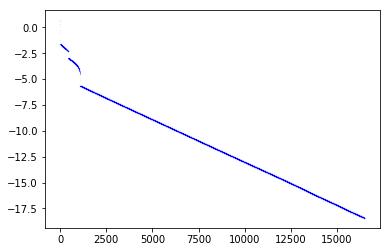

Число итераций: 
16496
Норма невязки: 
9.992464018842715e-09
Норма ошибки: 
2.5015356305358723e-08
Решение: 
(0.9999999888304821, 0.9999999776167491)


In [20]:
#3 способ
X_3 = []
Y_3 = []
x = 0
y = 3
numb = 0
while(np.linalg.norm(gradient(x, y)) > 0.00000001):
    grad = gradient(x, y)
    t = find_t_for_min_residual(x, y)
    #print(x, y, t, grad[0], grad[1])
    x = x - t * grad[0]
    y = y -  t * grad[1]
    X_3.append(numb)
    Y_3.append(math.log(np.linalg.norm(gradient(x, y))))
    numb += 1
plot = plt.pyplot.scatter(X_3, Y_3, s = 0.001, c = 'b')
plt.pyplot.show()
print("Число итераций: ")
print(numb)
print("Норма невязки: ")
print(np.linalg.norm(gradient(x, y)))
print("Норма ошибки: ")
error = [x - 1, y - 1]
print(np.linalg.norm(error)) 
print("Решение: ")
print(x, y)

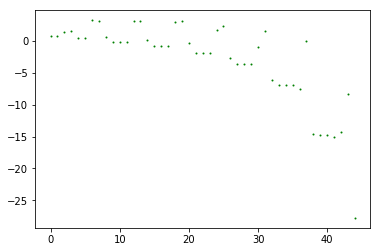

Число итераций: 
45
Норма невязки: 
8.904483952701765e-13
Норма ошибки: 
2.1920285824377244e-12
Решение: 
(0.9999999999990211, 0.9999999999980387)


In [21]:
#4 способ
X_4 = []
Y_4 = []
x_1 = 0
y_1 = 3
numb = 0
while(np.linalg.norm(gradient(x_1, y_1)) > 0.00000001):
    grad = gradient(x_1, y_1)
    if(numb == 0):
        t = find_t_for_quickest_discent(x_1, y_1)
    else:
        delta = np.linalg.norm(gradient(x_1, y_1) - gradient(x_0, y_0))
        if(delta != 0):
            t = np.dot([x_1 - x_0, y_1 - y_0], gradient(x_1, y_1) - gradient(x_0, y_0)) / (delta * delta)
        else:
            print("problem")
            break
    #print(x_1, y_1, np.linalg.norm(gradient(x_1, y_1)))
    x_0 = x_1
    y_0 = y_1
    x_1 = x_1 - t * grad[0]
    y_1 = y_1 -  t * grad[1]
    X_4.append(numb)
    Y_4.append(math.log(np.linalg.norm(gradient(x_1, y_1))))
    numb += 1
plot = plt.pyplot.scatter(X_4, Y_4, s = 1, c = 'g')
plt.pyplot.show()
print("Число итераций: ")
print(numb)
print("Норма невязки: ")
print(np.linalg.norm(gradient(x_1, y_1)))
print("Норма ошибки: ")
error = [x_1 - 1, y_1 - 1]
print(np.linalg.norm(error)) 
print("Решение: ")
print(x_1, y_1)

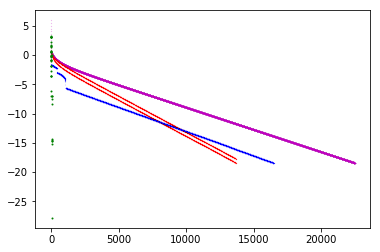

In [22]:
plot = plt.pyplot.scatter(X_1, Y_1, s = 0.01, c = 'm')
plot = plt.pyplot.scatter(X_2, Y_2, s = 0.001, c = 'r')
plot = plt.pyplot.scatter(X_3, Y_3, s = 0.001, c = 'b')
plot = plt.pyplot.scatter(X_4, Y_4, s = 1, c = 'g')
plt.pyplot.show()

|.| Метод 1 (t = 0.0019) | Метод 2 | Метод 3 | Метод 4 |
|-|-|-|-|-|
|Число итераций|22513|13708|16496|45|
|Норма невязки|9.995760711986306e-09|9.998091243884923e-09|9.992464018842715e-09|8.904483952701765e-13|
|Норма ошибки|2.5029400473995886e-08|2.240108961939946e-08|2.5015356305358723e-08|2.1920285824377244e-12|